In [2]:

import pandas as pd
import kagglehub
import os

import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score


from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
import seaborn as sns
import numpy as np
import optuna

In [15]:
"""from ydata_profiling import ProfileReport
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)"""

"from ydata_profiling import ProfileReport\npd.set_option('display.max_rows', 50)\npd.set_option('display.max_columns', 50)"

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
# Download latest version
path = kagglehub.dataset_download("nicholasjhana/energy-consumption-generation-prices-and-weather")

print("Path to dataset files:", path)


Path to dataset files: /Users/cedric-omeryapo/.cache/kagglehub/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/versions/1


Upload the dataset

In [5]:

path="/Users/cedric-omeryapo/.cache/kagglehub/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/versions/1"
# Vérifier si les fichiers existent
energy_file = os.path.join(path, "energy_dataset.csv")

Time: Datetime index localized to CET   
Generation biomass: biomass generation in MW  
Generation fossil brown coal/lignite: coal/lignite generation in MW  
Generation fossil coal-derived gas: coal gas generation in MW  
Generation fossil gas: gas generation in MW  
Generation fossil hard coal: coal generation in MW  
Generation fossil oil: oil generation in MW  
Generation fossil oil shale: shale oil generation in MW  
Generation fossil peat: peat generation in MW  
Generation geothermal: geothermal generation in MW  
Generation hydro pumped storage aggregated: hydro1 generation in MW  
Generation hydro pumped storage consumption: hydro2 generation in MW  
Generation hydro run-of-river and poundage: hydro3 generation in MW  
Generation hydro water reservoir: hydro4 generation in MW  
Generation marine: sea generation in MW  
Generation nuclear: nuclear generation in MW  
Generation other: other generation in MW  
Generation other renewable: other renewable generation in MW  
Generation solar: solar generation in MW  
Generation waste: waste generation in MW  
Generation wind offshore: wind offshore generation in MW  
Generation wind onshore: wind onshore generation in MW  
Gorecast solar day ahead: forecasted solar generation  
Gorecast wind offshore eday ahead: forecasted offshore wind generation  
Gorecast wind onshore day ahead: forecasted onshore wind generation  
Total load forecast: forecasted electrical demand  
Total load actual: actual electrical demand  
Price day ahead: forecasted price EUR/MWh  
Price actual: price in EUR/MWh   

In [6]:
energy_dataset = pd.read_csv(energy_file)
energy_dataset.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,NaN,2109.0,952.0,743.0,0.0,7098.0,43.0,74.0,34.0,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,NaN,2108.0,961.0,848.0,0.0,7098.0,43.0,74.0,34.0,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,NaN,2031.0,983.0,1012.0,0.0,7099.0,43.0,72.0,35.0,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,NaN,2119.0,1001.0,1015.0,0.0,7098.0,43.0,73.0,54.0,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,NaN,2170.0,1041.0,1357.0,0.0,7097.0,43.0,74.0,743.0,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


# Clean Energy dataset 

In [7]:
print("------"*15+"Info"+"------"*15)
display(energy_dataset.info())
print("------"*15+"nombre de valeur nulle"+"------"*15)
display(energy_dataset.isnull().sum())
print("------"*15+"description"+"------"*15)
display(energy_dataset.describe())


------------------------------------------------------------------------------------------Info------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale        

None

------------------------------------------------------------------------------------------nombre de valeur nulle------------------------------------------------------------------------------------------


time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

------------------------------------------------------------------------------------------description------------------------------------------------------------------------------------------


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


# Convertir la colonne 'time' en format datetime

In [8]:
energy_dataset['time'] = pd.to_datetime(energy_dataset['time'], utc=True)

In [9]:
energy_dataset.corr().head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,1.000000,-0.619146,-0.046354,NaN,0.227887,-0.188897,-0.279934,NaN,NaN,NaN,NaN,-0.101385,0.131221,-0.097785,NaN,-0.093594,-0.450401,0.783870,-0.018327,0.611088,NaN,-0.026269,-0.013434,NaN,-0.023530,0.044908,0.048352,0.300529,0.209150
generation biomass,-0.619146,1.000000,0.229809,NaN,-0.021660,0.433522,0.459530,NaN,NaN,NaN,NaN,-0.044898,-0.284877,-0.033675,NaN,-0.021279,0.658488,-0.560588,-0.004687,-0.346343,NaN,-0.068658,-0.008713,NaN,-0.072368,0.085216,0.083288,0.108945,0.142369
generation fossil brown coal/lignite,-0.046354,0.229809,1.000000,NaN,0.499808,0.768710,0.314869,NaN,NaN,NaN,NaN,-0.323771,-0.525005,-0.229455,NaN,-0.008440,0.097600,0.104552,0.040447,0.282810,NaN,-0.434118,0.042306,NaN,-0.436031,0.278503,0.280461,0.567905,0.364088
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,0.227887,-0.021660,0.499808,NaN,1.000000,0.541635,0.309623,NaN,NaN,NaN,NaN,-0.420646,-0.271527,0.060173,NaN,-0.112904,-0.066279,0.334880,0.074716,0.275053,NaN,-0.397298,0.080171,NaN,-0.397303,0.543711,0.548913,0.640895,0.461706
generation fossil hard coal,-0.188897,0.433522,0.768710,NaN,0.541635,1.000000,0.440837,NaN,NaN,NaN,NaN,-0.406116,-0.497940,-0.157677,NaN,-0.023930,0.264383,-0.019426,0.046185,0.170235,NaN,-0.441853,0.047356,NaN,-0.444490,0.394291,0.396564,0.671596,0.465641
generation fossil oil,-0.279934,0.459530,0.314869,NaN,0.309623,0.440837,1.000000,NaN,NaN,NaN,NaN,-0.331011,-0.106753,0.160465,NaN,0.015619,0.375046,-0.115087,0.100211,-0.175741,NaN,-0.051787,0.096435,NaN,-0.058244,0.498637,0.497089,0.292793,0.284679
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# drop empty columns

In [10]:
energy_dataset_C = energy_dataset.drop(columns=[
    "generation hydro pumped storage aggregated",
    "forecast wind offshore eday ahead",
    "generation fossil coal-derived gas",
    "generation fossil oil shale",
    "generation fossil peat",
    "generation geothermal",
    "generation marine",
    "generation wind offshore",
    "price day ahead"
])

energy_dataset_C.columns = energy_dataset_C.columns.str.replace(' ','_').str.replace('-','_')
energy_dataset_C.columns = energy_dataset_C.columns.str.replace(' ','_').str.replace('/','_')

energy_dataset_C.set_index("time", inplace=True)
energy_dataset_C.describe(include="all")

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_actual
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35064.000000,35064.000000,35064.000000,35028.000000,35064.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,1439.066735,5471.216689,28712.129962,28696.939905,57.884023
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,1677.703355,3176.312853,4594.100854,4574.987950,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24807.750000,49.347500
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,576.000000,4855.000000,28906.000000,28901.000000,58.020000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,2636.000000,7353.000000,32263.250000,32192.000000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,116.800000


In [11]:
print("------"*15+"nombre de colonne "+"------"*15)
display(energy_dataset_C.columns.value_counts().sum())
print("------"*15+"nombre de valeur nulle"+"------"*15)
display(energy_dataset.isnull().sum())

------------------------------------------------------------------------------------------nombre de colonne ------------------------------------------------------------------------------------------


19

------------------------------------------------------------------------------------------nombre de valeur nulle------------------------------------------------------------------------------------------


time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

<Axes: >

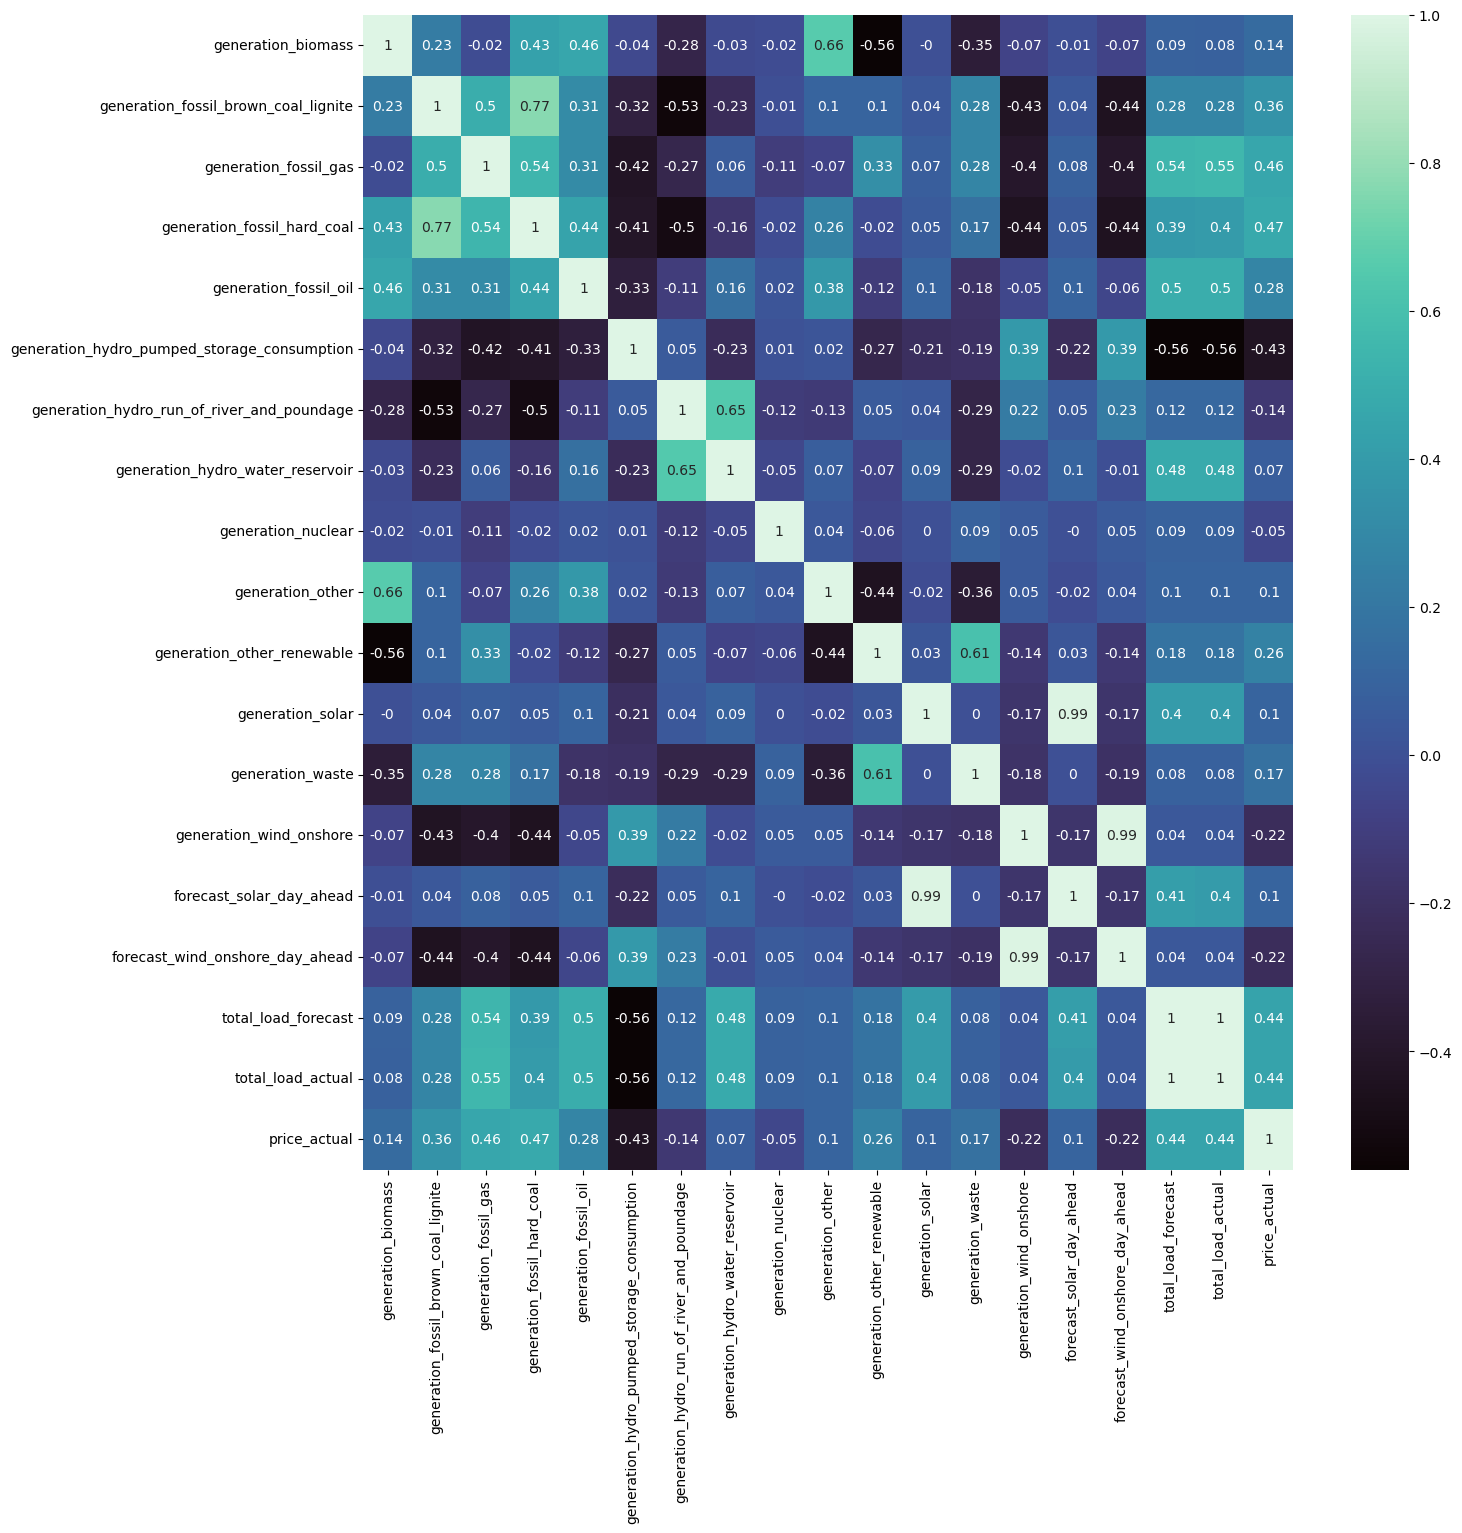

In [11]:
corr=round(energy_dataset_C.corr(),2)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True,cmap='mako')

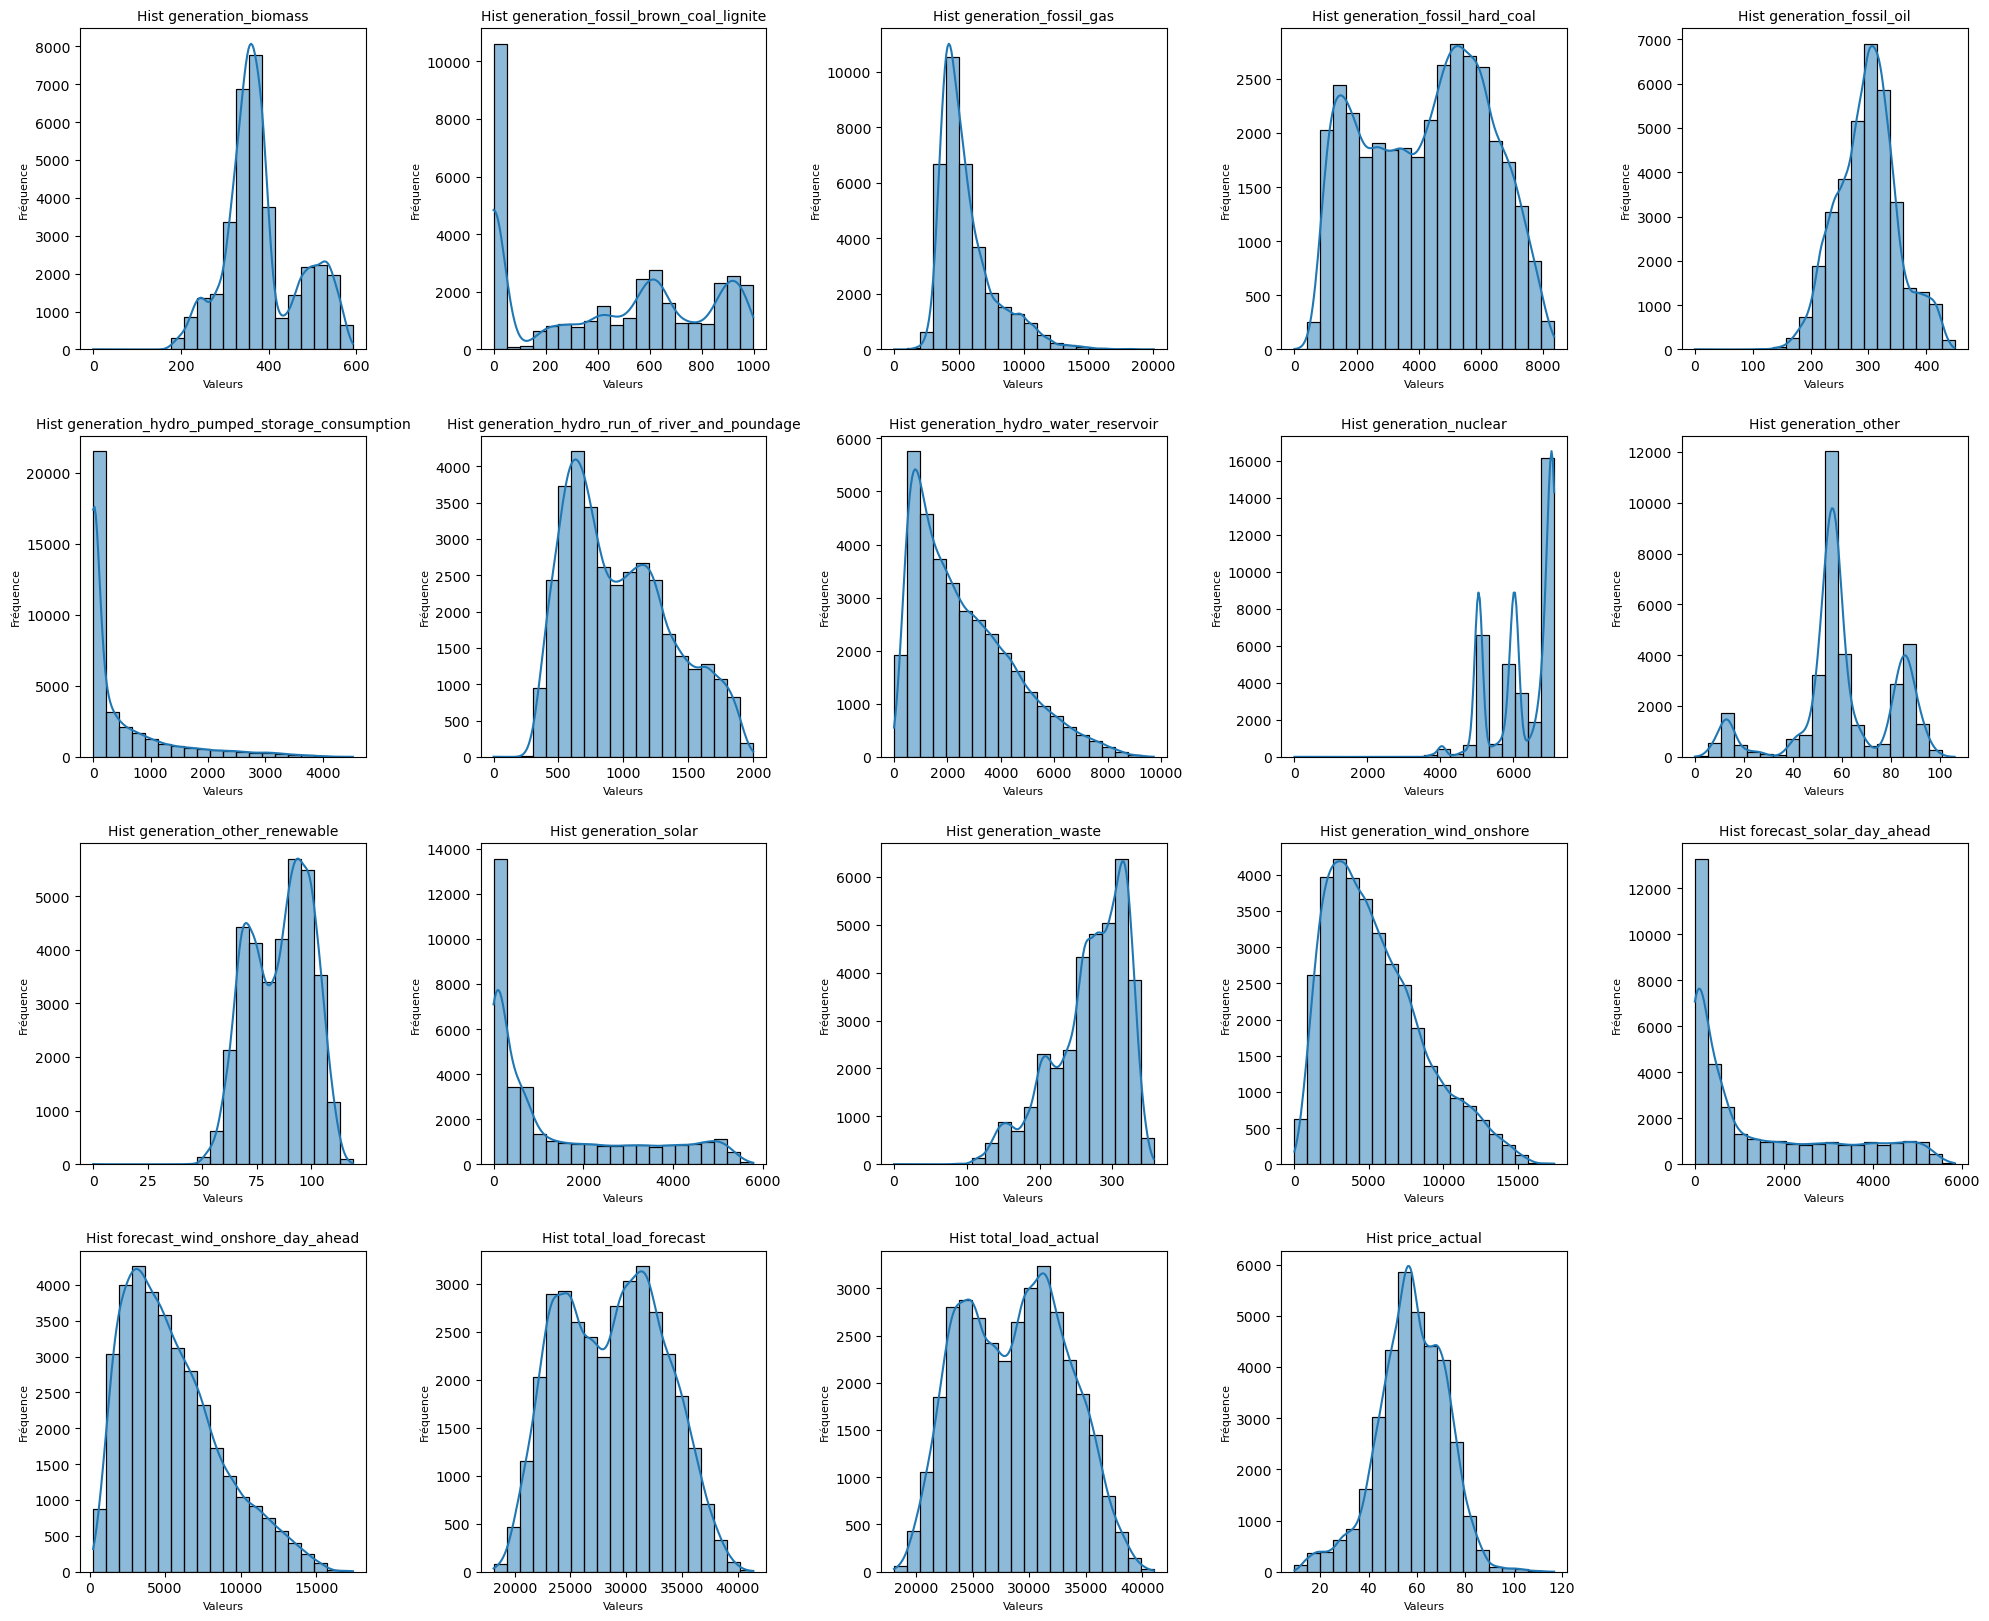

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))  

# Créer des sous-graphiques avec des ajustements
for i, col in enumerate(energy_dataset_C.columns):
    plt.subplot(5, 5, i + 1)  
    sns.histplot(data=energy_dataset_C[col].dropna(), bins=20, kde=True)
    
    
    plt.title(f"Hist {col}", fontsize=10)  
    
    
    plt.xlabel("Valeurs", fontsize=8)
    plt.ylabel("Fréquence", fontsize=8)


plt.tight_layout(h_pad=2, w_pad=2)  

# Afficher les graphiques
plt.show()


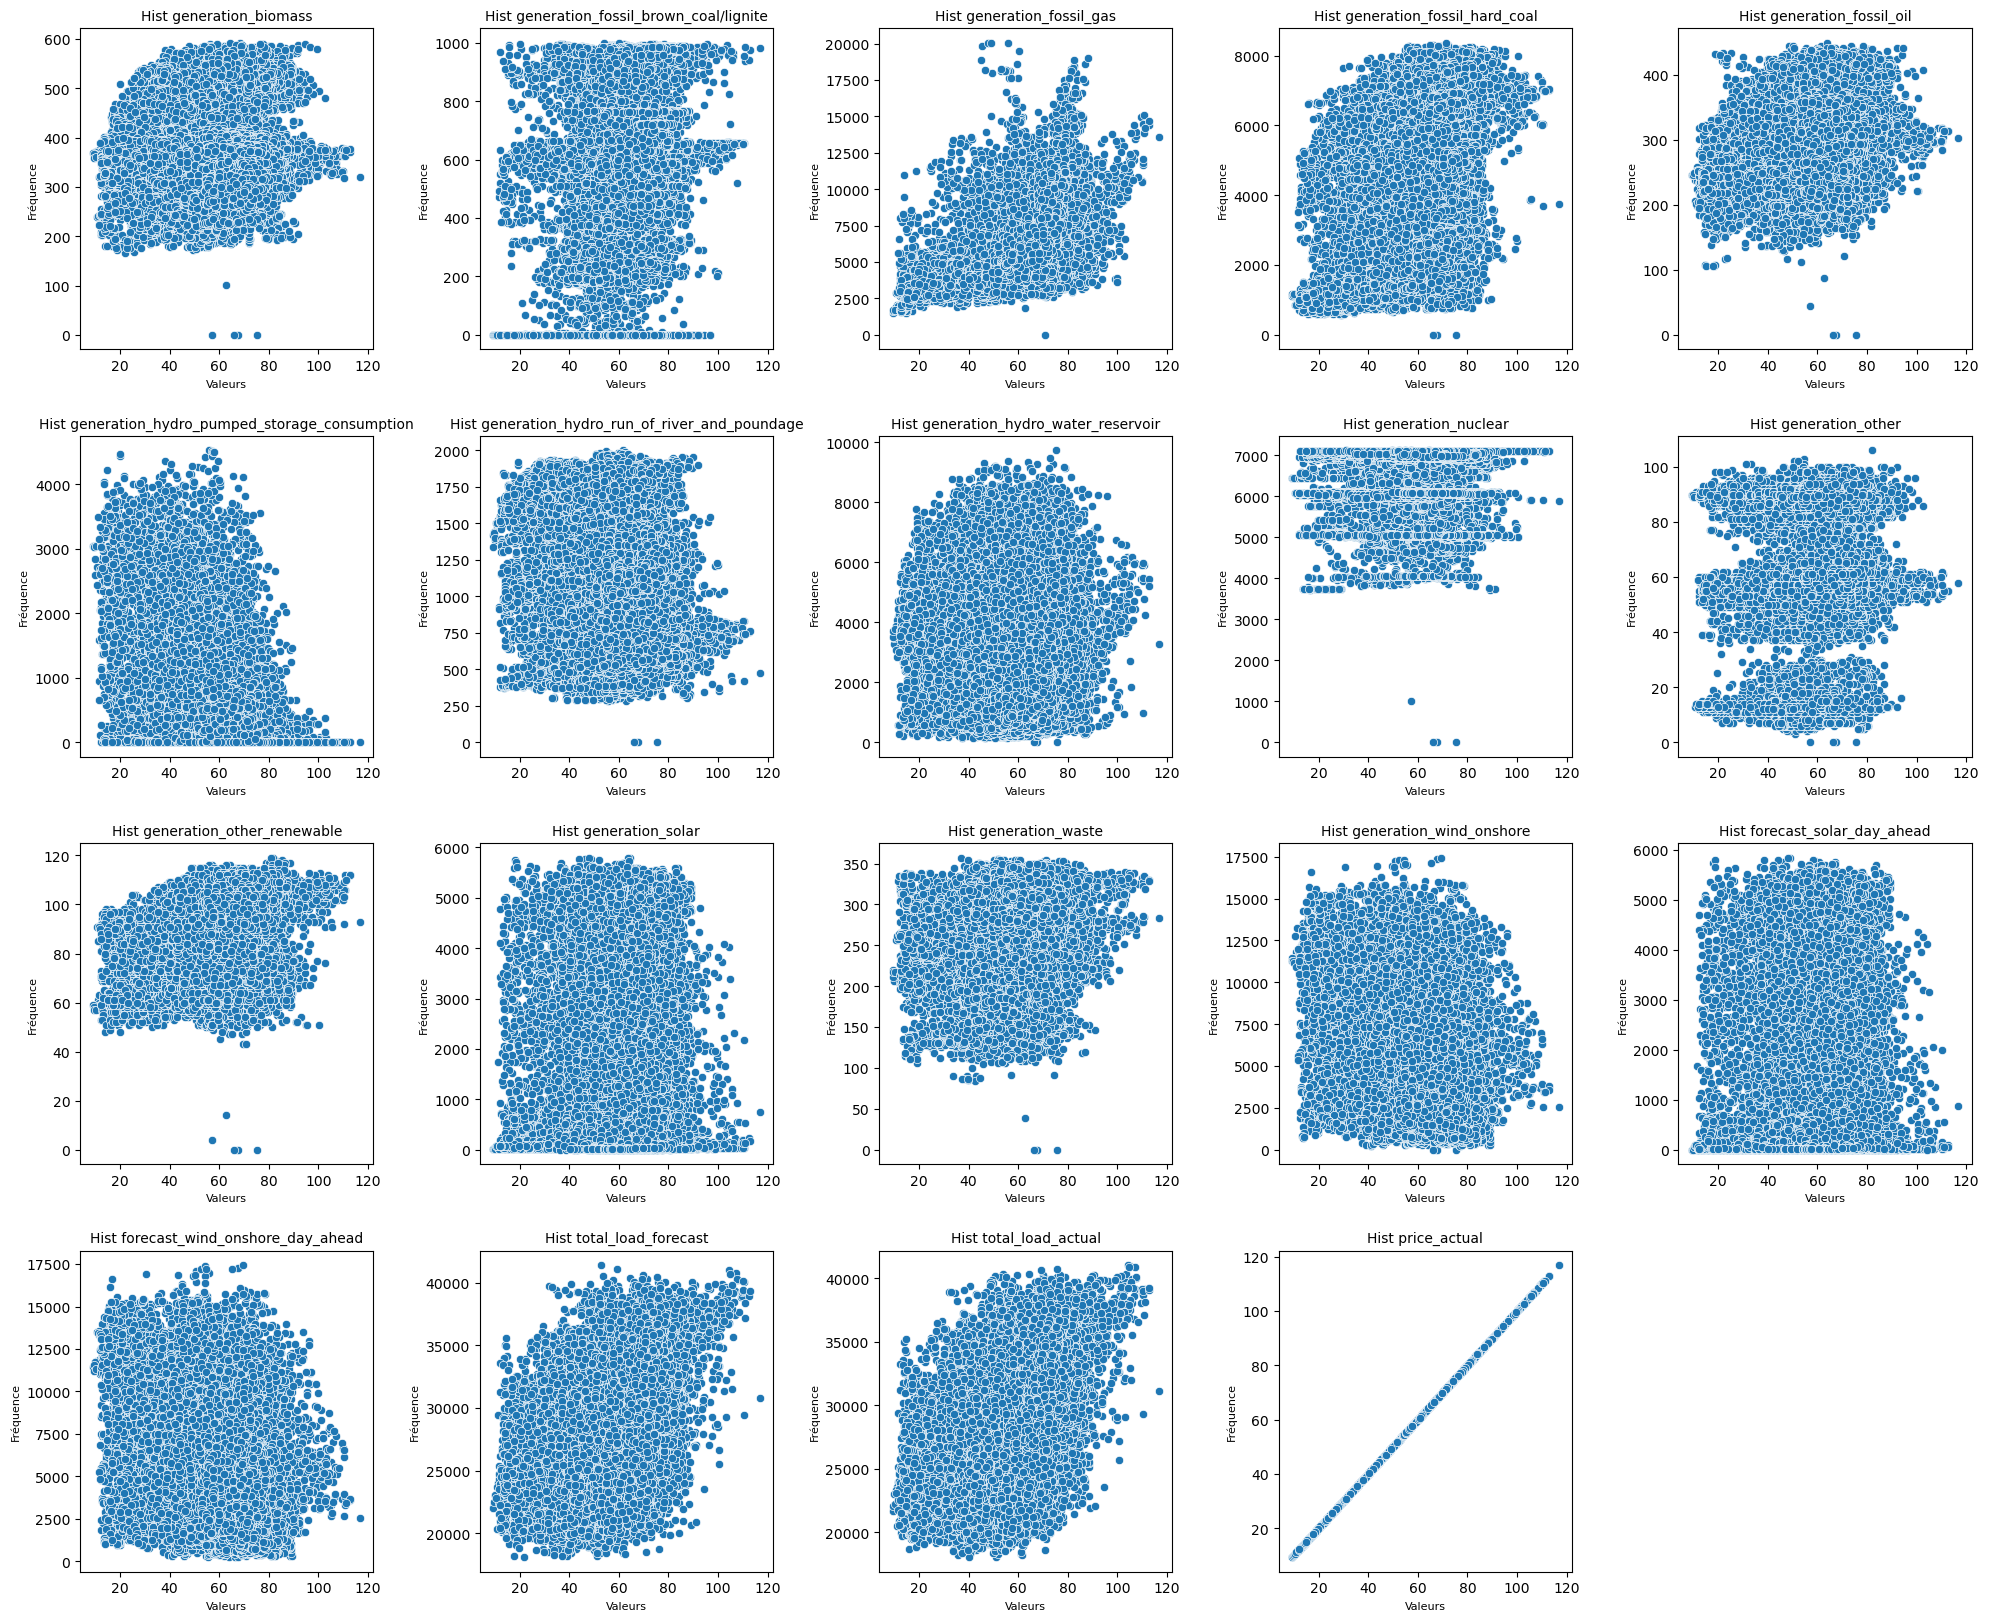

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))  

# Créer des sous-graphiques avec des ajustements
for i, col in enumerate(energy_dataset_C.columns):
    plt.subplot(5, 5, i + 1)  # Modifier pour afficher 25 sous-graphiques max
    sns.scatterplot(y=str(col),x="price_actual",data=energy_dataset_C)
    
    
    plt.title(f"Hist {col}", fontsize=10)  
    
    
    plt.xlabel("Valeurs", fontsize=8)
    plt.ylabel("Fréquence", fontsize=8)


plt.tight_layout(h_pad=2, w_pad=2)  

# Afficher les graphiques
plt.show()


# Baseline - Creation du pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Identification des variables categoriels et numerique 
y = pd.DataFrame(energy_dataset_C['price_actual'])
X = pd.DataFrame(energy_dataset_C.drop(columns='price_actual'))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

#defintion des variables numérique et categorielle

categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

print('categorical columns :', categorical_cols)
print('numerical columns :', numerical_cols)

#Preprocessing

# Numerical and categorical pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# Updated ColumnTransformer for full preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
    ],
    remainder='drop'  
)

preprocessor.set_output(transform="pandas")

preprocessor.fit_transform(X_train,y_train)
preprocessor

categorical columns : []
numerical columns : ['generation_biomass', 'generation_fossil_brown_coal_lignite', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption', 'generation_hydro_run_of_river_and_poundage', 'generation_hydro_water_reservoir', 'generation_nuclear', 'generation_other', 'generation_other_renewable', 'generation_solar', 'generation_waste', 'generation_wind_onshore', 'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead', 'total_load_forecast', 'total_load_actual']


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['generation_biomass',
                                  'generation_fossil_brown_coal_lignite',
                                  'generation_fossil_gas',
                                  'generation_fossil_hard_coal',
                                  'generation_fossil_oil',
                                  'generation_hydro_pumped_storage_consumption',
                                  'generation_hydro_run_of_river_and_poundage',
                                  'generation_hydro_water_reservoir',
                                  'generation_nuclear', 'generation_other',
                                  'generation_other_renewable',
                                  'generation_solar', 'generation_waste',
                                  'generation_wind_onshore',
                                  'forecast_solar_day_ahead',
                                  'forecast_wind_onshore_day_ahead',
                                  'total_load_forecast',
                                  'total_load_actual'])])

# Baseline - Regression lineaire - Test 1 
precision R2 etait trop faible 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Model pipeline
model = LinearRegression()
pipeline_reg = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline_reg.set_output(transform="pandas")

# Fit the pipeline on the training data
pipeline_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline_reg.predict(X_test)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = pipeline_reg.score(X_train, y_train)
val_scores = cross_val_score(pipeline_reg, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics
print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("MAPE: ", np.round(mape, 2))
print(f"Mean CV Score: {mean_val_score}, Std CV Score: {std_val_score}")
pipeline_reg

RMSE:  11.33
R2:  0.38
MAPE:  0.18
Mean CV Score: 0.3773397209661732, Std CV Score: 0.006428977708928069


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['generation_biomass',
                                                   'generation_fossil_brown_coal_lignite',
                                                   'generation_fossil_gas',
                                                   'generation_fossil_hard_coal',
                                                   'generation_fossil_oil',
                                                   'generation_hydro_pumped_storage_consumption',
                                                   'generation_hydro_run_of_river_and_poundage',
                                                   'generation_hydro_water_reservoir',
                                                   'generation_nuclear',
                                                   'generation_other',
                                                   'generation_other_renewable',
                                                   'generation_solar',
                                                   'generation_waste',
                                                   'generation_wind_onshore',
                                                   'forecast_solar_day_ahead',
                                                   'forecast_wind_onshore_day_ahead',
                                                   'total_load_forecast',
                                                   'total_load_actual'])])),
                ('model', LinearRegression())])

# Baseline - Histogradient boosting regressor - Test 2


In [14]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Model pipeline
model = HistGradientBoostingRegressor()
pipeline_his = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline_his.set_output(transform="pandas")

# Fit the pipeline on the training data
pipeline_his.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline_his.predict(X_test)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = pipeline_his.score(X_train, y_train)
val_scores = cross_val_score(pipeline_his, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics
print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("MAPE: ", np.round(mape, 2))
print(f"Mean CV Score: {mean_val_score}, Std CV Score: {std_val_score}")
pipeline_his

/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.12/site-packages/sklearn

RMSE:  7.57
R2:  0.77
MAPE:  0.11
Mean CV Score: 0.7020026316188414, Std CV Score: 0.005530473074938564


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['generation_biomass',
                                                   'generation_fossil_brown_coal_lignite',
                                                   'generation_fossil_gas',
                                                   'generation_fossil_hard_coal',
                                                   'generation_fossil_oil',
                                                   'generation_hydro_pumped_storage_consumption',
                                                   'ge...dro_run_of_river_and_poundage',
                                                   'generation_hydro_water_reservoir',
                                                   'generation_nuclear',
                                                   'generation_other',
                                                   'generation_other_renewable',
                                                   'generation_solar',
                                                   'generation_waste',
                                                   'generation_wind_onshore',
                                                   'forecast_solar_day_ahead',
                                                   'forecast_wind_onshore_day_ahead',
                                                   'total_load_forecast',
                                                   'total_load_actual'])])),
                ('model', HistGradientBoostingRegressor())])

# Baseline - Gradient Boost Test - Test 3

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = GradientBoostingRegressor()
pipeline_gra = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline_gra.set_output(transform="pandas")

# Fit the pipeline on the training data
pipeline_gra.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline_gra.predict(X_test)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = pipeline_gra.score(X_train, y_train)
val_scores = cross_val_score(pipeline_gra, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics
print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("MAPE: ", np.round(mape, 2))
print(f"Mean CV Score: {mean_val_score}, Std CV Score: {std_val_score}")
pipeline_gra

RMSE:  9.6
R2:  0.57
MAPE:  0.15
Mean CV Score: 0.5523365879846017, Std CV Score: 0.008063490897015684


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['generation_biomass',
                                                   'generation_fossil_brown_coal_lignite',
                                                   'generation_fossil_gas',
                                                   'generation_fossil_hard_coal',
                                                   'generation_fossil_oil',
                                                   'generation_hydro_pumped_storage_consumption',
                                                   'ge...n_hydro_run_of_river_and_poundage',
                                                   'generation_hydro_water_reservoir',
                                                   'generation_nuclear',
                                                   'generation_other',
                                                   'generation_other_renewable',
                                                   'generation_solar',
                                                   'generation_waste',
                                                   'generation_wind_onshore',
                                                   'forecast_solar_day_ahead',
                                                   'forecast_wind_onshore_day_ahead',
                                                   'total_load_forecast',
                                                   'total_load_actual'])])),
                ('model', GradientBoostingRegressor())])

# Definition du modèle le plus interessant en fonction du score R2, rmse et mape de la cross-validation 

On teste ici une multitude de modèle afin de pouvoir de les comparer en fonction des metrics 

In [48]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import numpy as np

model_à_tester=[GradientBoostingRegressor,HistGradientBoostingRegressor,LinearRegression,RandomForestRegressor,Ridge,Lasso]
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for i in model_à_tester:
    # Model pipeline
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', i())])
    pipeline.set_output(transform="pandas")

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)


    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    scores = pipeline.score(X_train, y_train)
    val_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_val_score = val_scores.mean()
    std_val_score = val_scores.std()

    # Output metrics
    print(f"Model: {i.__name__}")
    print(f"RMSE: ", np.round(rmse, 2))
    print(f"R2:", np.round(scores, 2))
    print(f"mape: ", np.round(mape, 2))
    print(f"mean_val_score={mean_val_score}")
    print(f"std_val_score={std_val_score}")
    print("-" * 40)

Model: GradientBoostingRegressor
RMSE:  9.55
R2: 0.58
mape:  0.15
mean_val_score=0.55585737935322
std_val_score=0.007920145395317374
----------------------------------------
Model: HistGradientBoostingRegressor
RMSE:  7.63
R2: 0.58
mape:  0.11
mean_val_score=0.5558544138088839
std_val_score=0.007934195619172371
----------------------------------------
Model: LinearRegression
RMSE:  11.27
R2: 0.58
mape:  0.18
mean_val_score=0.5558287966155884
std_val_score=0.007935607627544044
----------------------------------------
Model: RandomForestRegressor
RMSE:  5.78
R2: 0.58
mape:  0.08
mean_val_score=0.5557827064603416
std_val_score=0.007964271397623774
----------------------------------------
Model: Ridge
RMSE:  11.27
R2: 0.58
mape:  0.18
mean_val_score=0.5558627568315815
std_val_score=0.00792576335319861
----------------------------------------
Model: Lasso
RMSE:  11.46
R2: 0.58
mape:  0.19
mean_val_score=0.5558220010700372
std_val_score=0.007936789741596919
----------------------------------

Suite à l'entrainement, nous avons décider de poursuivre notre analyse avec un HistGradientBoostingRegressor car ce modèle au dela bien saisir la predictabilité, il nous offre une bonne stabilité 

In [16]:

# Model pipeline
model = HistGradientBoostingRegressor()
my_pipeline = Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('model', model)
                            ])
my_pipeline.set_output(transform="pandas")

my_pipeline.fit(X_train,y_train)
# Predictions
y_pred = my_pipeline.predict(X_test)

# Evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))
my_pipeline

RMSE:  7.61
R2:  0.76
mape:  0.11


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['generation_biomass',
                                                   'generation_fossil_brown_coal_lignite',
                                                   'generation_fossil_gas',
                                                   'generation_fossil_hard_coal',
                                                   'generation_fossil_oil',
                                                   'generation_hydro_pumped_storage_consumption',
                                                   'ge...dro_run_of_river_and_poundage',
                                                   'generation_hydro_water_reservoir',
                                                   'generation_nuclear',
                                                   'generation_other',
                                                   'generation_other_renewable',
                                                   'generation_solar',
                                                   'generation_waste',
                                                   'generation_wind_onshore',
                                                   'forecast_solar_day_ahead',
                                                   'forecast_wind_onshore_day_ahead',
                                                   'total_load_forecast',
                                                   'total_load_actual'])])),
                ('model', HistGradientBoostingRegressor())])

In [17]:
# Assign variables for baselines and calculate baselines
y_pred = [y_train.mean()]*len(y_train)
mean_pred = y_train.mean()

baseline_rmse = root_mean_squared_error(y_train,y_pred)

# Print statement to show all baseline values
print('Mean Price Per KW/h Baseline Pred:', mean_pred)
print('-------------------------------------------------------------------')
print('RMSE:',baseline_rmse)

Mean Price Per KW/h Baseline Pred: 57.912637711864406
-------------------------------------------------------------------
RMSE: 14.173160623162811


# Grid Search - paramètres tunning


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),    
    ('model', HistGradientBoostingRegressor())  
])

# Define the parameter grid
param_grid = {
    'model__learning_rate': [0.1, 0.05, 0.02, 0.01],
    'model__max_iter': [100, 200, 300, 400, 500],
    'model__max_leaf_nodes': [100, 200, 300, 400, 500],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Evaluate on the test set


print("Best Params:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Test Set Score:", grid_search.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   1.9s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   1.9s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   1.9s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   2.0s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   2.0s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=200; total time=   3.3s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=200; total time=   3.4s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=200; total time=   3.4s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=200; total time=   3.3s
[CV] END model__lea

# Random search paramètre tunnning

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import random

pipeline = Pipeline([
    ('preprocessor', preprocessor),    
    ('model', HistGradientBoostingRegressor())  
])

param_distributions = {
'model__max_iter': randint(10, 1000),
'model__max_leaf_nodes':randint(10,500),
'model__learning_rate':uniform(0.01, 0.2)
}
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)
print("Test Set Score:", random_search.best_estimator_.score(X_test, y_test))

Best Params: {'model__learning_rate': 0.10256259092097872, 'model__max_iter': 633, 'model__max_leaf_nodes': 272}
Best Cross-Validation Score: 0.8529533013008747
Test Set Score: 0.8795803671064316


# Optuna - Params Tunning

In [54]:
"""#optuna params
import numpy as np
import pandas as pd
import optuna
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

# Assuming energy_dataset_C is defined and contains your dataset
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Define a function to optimize the model's hyperparameters
def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.0)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 256)

    # Model pipeline
    model = HistGradientBoostingRegressor(
        learning_rate=learning_rate,
        max_iter=max_iter,
        max_leaf_nodes=max_leaf_nodes,
        random_state=42
    )

    onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Define numerical columns for preprocessing
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

    # Define the preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[('encoder', onehot_encoder, categorical_cols),  
                      ('num', SimpleImputer(strategy='mean'), numerical_cols)]
    )

    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model and evaluate RMSE
    my_pipeline.fit(X_train, y_train)
    y_pred = my_pipeline.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)

    return -cross_val_score(model, X_train, y_train, cv=5,scoring='neg_root_mean_squared_error').mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print(study.best_params)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best RMSE:", study.best_value)

# Optionally, you can fit the model again with the best hyperparameters
best_params = study.best_params
best_model = HistGradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    max_iter=best_params['max_iter'],
    max_leaf_nodes=best_params['max_leaf_nodes'],
    random_state=42
)

# Fit the best model on the training data
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])

final_pipeline.fit(X_train, y_train)

# Predict and evaluate with the best model
final_y_pred = final_pipeline.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_y_pred)
final_mape = mean_absolute_percentage_error(y_test, final_y_pred)
final_scores = final_pipeline.score(X_train, y_train)

# Output metrics
print("Final RMSE: ", np.round(final_rmse, 2))
print("Final R2: ", np.round(final_scores, 2))
print("Final MAPE: ", np.round(final_mape, 2))
"""

[I 2024-11-08 15:22:34,370] A new study created in memory with name: no-name-16aa3ddf-b3b7-4f52-ae24-4639a02684f8
/var/folders/sm/3vyr84ld18s1tsvqc054gtmr0000gn/T/ipykernel_77287/846703241.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.0)
[I 2024-11-08 15:23:50,343] Trial 0 finished with value: 6.955222714565123 and parameters: {'learning_rate': 0.010150073366053442, 'max_iter': 395, 'max_leaf_nodes': 175}. Best is trial 0 with value: 6.955222714565123.
/var/folders/sm/3vyr84ld18s1tsvqc054gtmr0000gn/T/ipykernel_77287/846703241.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = tria

{'learning_rate': 0.09070280434358921, 'max_iter': 547, 'max_leaf_nodes': 181}
Best hyperparameters: {'learning_rate': 0.09070280434358921, 'max_iter': 547, 'max_leaf_nodes': 181}
Best RMSE: 5.388520088120265
Final RMSE:  4.96
Final R2:  0.99
Final MAPE:  0.07


# Optuna best params
Best hyperparameters: {'learning_rate': 0.09070280434358921, 'max_iter': 547, 'max_leaf_nodes': 181}  
Best RMSE: 5.388520088120265  
Final RMSE:  4.96  
Final R2:  0.99  
Final MAPE:  0.07  

# Modèle Finale - With Best Params

In [20]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error


# Model pipeline
model = HistGradientBoostingRegressor(learning_rate= 0.09070280434358921, max_iter=547, max_leaf_nodes= 181)
my_pipeline = Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('model', model)
                            ])
my_pipeline.set_output(transform="pandas")

my_pipeline.fit(X_train,y_train)
# Predictions
y_pred = my_pipeline.predict(X_test)

# Evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)
val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))
 
print(f"mean_val_score={mean_val_score}")
print(f"std_val_score={std_val_score}")



RMSE:  4.98
R2:  0.98
mape:  0.07
mean_val_score=0.8567510974560676
std_val_score=0.006074112030198043


# Ajout de Features saison

In [27]:
# Sort index
energy_dataset_C= energy_dataset_C.sort_index()
    
    # Set conditional satements for filtering times of month to season value
condition_winter = (energy_dataset_C.index.month>=1)&(energy_dataset_C.index.month<=3)
condtion_spring = (energy_dataset_C.index.month>=4)&(energy_dataset_C.index.month<=6)
condition_summer = (energy_dataset_C.index.month>=7)&(energy_dataset_C.index.month<=9)
condition_automn = (energy_dataset_C.index.month>=10)@(energy_dataset_C.index.month<=12)

# Create column in dataframe that inputs the season based on the conditions created above
energy_dataset_C['season'] = np.where(condition_winter,'winter',
                        np.where(condtion_spring,'spring',
                                     np.where(condition_summer,'summer',
                                              np.where(condition_automn,'automn',np.nan))))
energy_dataset_C 

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_actual,season
time,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,automn
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,64.92,winter
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,64.48,winter
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,59.32,winter
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,56.04,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,77.02,automn
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,76.16,automn
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,74.30,automn


# Model avec season 

In [22]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder


# Model pipeline
model = HistGradientBoostingRegressor(learning_rate= 0.09070280434358921, max_iter=547, max_leaf_nodes= 181)

onehot_encoder =  OneHotEncoder(handle_unknown='ignore',sparse_output=False)

# Define numerical columns for preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[('encoder',onehot_encoder,categorical_cols),  
                ('num', SimpleImputer(strategy='mean'), numerical_cols)  # Impute missing values for numeric columns
    ],
    remainder='passthrough'  
)



my_pipeline = Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('model', model)
                            ])
my_pipeline.set_output(transform="pandas")

my_pipeline.fit(X_train,y_train)
# Predictions
y_pred = my_pipeline.predict(X_test)

# Evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)
val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))
 
print(f"mean_val_score={mean_val_score}")
print(f"std_val_score={std_val_score}")




RMSE:  4.93
R2:  0.99
mape:  0.07
mean_val_score=0.8571633774527344
std_val_score=0.004333448445504336


# prediction avec definition de Features

In [28]:
features = {
        'generation_biomass': 150,
        'generation_fossil_brown_coal_lignite': 200,
        'generation_fossil_gas': 100,
        'generation_fossil_hard_coal': 150,
        'generation_fossil_oil': 30,
        'generation_hydro_pumped_storage_consumption': 40,
        'generation_hydro_run_of_river_and_poundage': 50,
        'generation_hydro_water_reservoir': 0,
        'generation_nuclear': 0,
        'generation_other': 0,
        'generation_other_renewable': 70,
        'generation_solar': 10,
        'generation_waste': 30,
        'generation_wind_onshore': 50,
        'forecast_solar_day_ahead': 10,
        'forecast_wind_onshore_day_ahead': 0,
        'total_load_forecast': 1500,
        'total_load_actual': 1500,
        'season': 'summer'  # Adjust based on the conditions
    }
pred=my_pipeline.predict(pd.DataFrame([features]))


pred

array([51.28616497])

# Prediction après optimisation du modèle

In [29]:
mean_pred = y_pred.mean()

rmse = root_mean_squared_error(y_test,y_pred)

# Print statement to show all baseline values
print('Mean Price Per KW/h Pred:', mean_pred)
print('-------------------------------------------------------------------')
print('RMSE:',rmse)

Mean Price Per KW/h Pred: 57.83611369000541
-------------------------------------------------------------------
RMSE: 4.932829257705223


# ML Flow

In [31]:

import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder



mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.end_run()
mlflow.set_experiment("ML project energie")
# Start an MLflow run
with mlflow.start_run():
    
    mlflow.set_tag("Model type", "HistGradientBoostingRegressor")
   

    y = energy_dataset_C['price_actual']
    X = energy_dataset_C.drop(columns='price_actual')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

    # Modèle pipeline
    model = HistGradientBoostingRegressor(learning_rate= 0.09070280434358921, max_iter=547, max_leaf_nodes= 181)
    
    mlflow.log_param("learning_rate", model.learning_rate)
    mlflow.log_param("max_iter", model.max_iter)
    mlflow.log_param("max_leaf_nodes", model.max_leaf_nodes)

    onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Définir les colonnes numériques pour le prétraitement
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

    # Définir le pipeline de prétraitement
    preprocessor = ColumnTransformer(
        transformers=[
            ('encoder', onehot_encoder, categorical_cols),  
            ('num', SimpleImputer(strategy='mean'), numerical_cols)  # Impute missing values for numeric columns
        ],
        remainder='passthrough'  
    )

    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    my_pipeline.set_output(transform="pandas")

    # Entraînement du modèle
    my_pipeline.fit(X_train, y_train)
    y_pred = my_pipeline.predict(X_test)

    # Évaluation des métriques
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    scores = my_pipeline.score(X_train, y_train)
    val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5)
    mean_val_score = val_scores.mean()
    std_val_score = val_scores.std()
    
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", scores)
    mlflow.log_metric("MAPE", mape)
    mlflow.log_metric("mean_val_score", mean_val_score)
    mlflow.log_metric("std_val_score", std_val_score)

/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.12/site-packages/mlflow/models/__init__.py:37: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.utc_time_created = str(utc_time_created or datetime.utcnow())


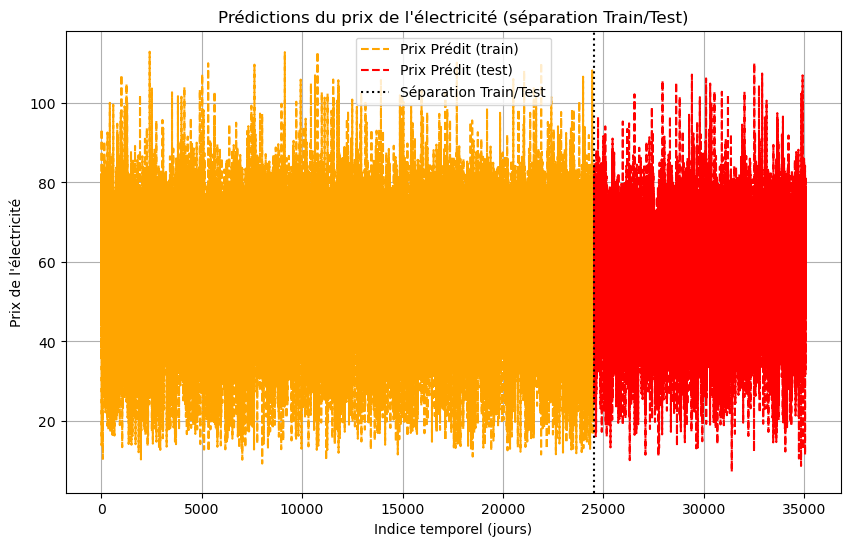

In [30]:
# Faire des prédictions pour le jeu de test (cela suppose que le modèle est déjà entraîné)
y_train_pred = my_pipeline.predict(X_train)  # Prédictions pour le jeu de train
y_test_pred = my_pipeline.predict(X_test)  # Faire des prédictions correctes sur le jeu de test

# Créer une liste des indices (jours ou observations) pour les parties train et test
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))  # Assure que la taille est la même que y_test et y_test_pred

# Tracer les résultats
plt.figure(figsize=(10, 6))

# Tracer les prédictions pour le train et le test
plt.plot(train_indices, y_train_pred, label='Prix Prédit (train)', linestyle='--', color='orange')
plt.plot(test_indices, y_test_pred, label='Prix Prédit (test)', linestyle='--', color='red')

# Ajouter une ligne de séparation entre la partie train et test
plt.axvline(x=len(y_train), color='black', linestyle=':', label='Séparation Train/Test')

# Ajouter des titres et des labels
plt.title("Prédictions du prix de l'électricité (séparation Train/Test)")
plt.xlabel("Indice temporel (jours)")
plt.ylabel("Prix de l'électricité")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


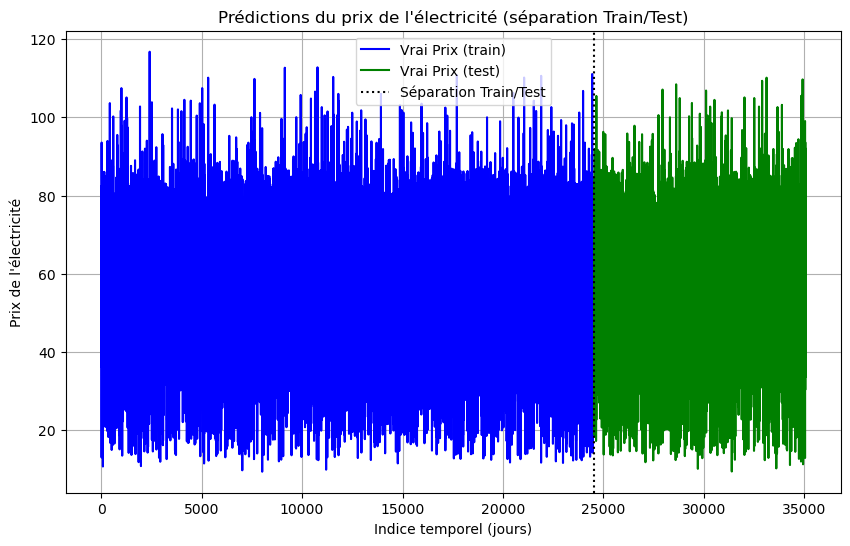

In [38]:
# Faire des prédictions pour le jeu de test (cela suppose que le modèle est déjà entraîné)
y_train_pred = my_pipeline.predict(X_train)  # Prédictions pour le jeu de train
y_test_pred = my_pipeline.predict(X_test)  # Faire des prédictions correctes sur le jeu de test

# Créer une liste des indices (jours ou observations) pour les parties train et test
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))  # Assure que la taille est la même que y_test et y_test_pred

# Tracer les résultats
plt.figure(figsize=(10, 6))

# Tracer les vrais prix pour le train et le test
plt.plot(train_indices, y_train, label='Vrai Prix (train)', color='blue')
plt.plot(test_indices, y_test, label='Vrai Prix (test)', color='green')

# Ajouter une ligne de séparation entre la partie train et test
plt.axvline(x=len(y_train), color='black', linestyle=':', label='Séparation Train/Test')

# Ajouter des titres et des labels
plt.title("Prédictions du prix de l'électricité (séparation Train/Test)")
plt.xlabel("Indice temporel (jours)")
plt.ylabel("Prix de l'électricité")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

In [72]:
# Assign variables for baselines and calculate baselines
y_pred = [y_train.mean()]*len(y_train)
mean_pred = y_train.mean()

baseline_rmse = root_mean_squared_error(y_train,y_pred)

# Print statement to show all baseline values
print('Mean Price Per KW/h Baseline Pred:', mean_pred)
print('-------------------------------------------------------------------')
print('RMSE:',baseline_rmse)

Mean Price Per KW/h Baseline Pred: 57.912637711864406
-------------------------------------------------------------------
RMSE: 14.173160623162811
